<a href="https://colab.research.google.com/github/eubrunoread/InvestigaDados/blob/main/notebook/Plotagem_Mapa_CSV_Cortex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SOLUÇÃO PARA PLOTAGEM NO MAPA DE DADOS EXPORTADOS DO CORTEX EM FORMATO CSV**
----
*Desenvolvido pelo Agente PCSC **Bruno Bevilaqua Lemos** como parte de um projeto pessoal de aprendizagem de Phyton, sugestões ou correções podem ser enviadas para bruno-lemos@pc.sc.gov.br*

----

*Para rodar código pressione CTRL+F9, ou vá clicando no botão 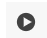 em cada célula.*

-----
Este código faz o upload, processamento e visualização de um arquivo CSV contendo dados geográficos (latitude e longitude), além de criar um mapa interativo com marcadores e um trajeto traçado, utilizando a biblioteca Folium e a funcionalidade AntPath para visualização.


### ***Fluxo geral:***

1. O usuário faz upload de um arquivo CSV com colunas 'Latitude', 'Longitude' e 'DataHora'.

2. O script lê, ordena, e adiciona marcadores no mapa com a sequência temporal dos dados.

3. Um trajeto é desenhado entre os pontos, e o mapa interativo é salvo e baixado como HTML.

In [ ]:
import pandas as pd
import folium
from google.colab import files
from folium.plugins import AntPath

#**Upload do arquivo CSV**

Faça o uploado do arquivo CSV.

In [ ]:
# Faz o upload dos arquivos CSV
uploaded = files.upload()

for fn in uploaded.keys():
  print('Upload do arquivo "{name}" com o tamanho de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
# Processar cada arquivo
for arquivo in uploaded.keys():
    print(f'\nProcessando o arquivo: {arquivo}')
    # Processar cada arquivo
    df = pd.read_csv(arquivo, sep=';')
df

In [ ]:
# Ordenar por Data e Hora, e cria uma coluna com a sequencia temporal
df['DataHora'] = pd.to_datetime(df['DataHora'], format='%d/%m/%Y %H:%M:%S')
df_ordenado = df.sort_values(by='DataHora', ascending=True).reset_index(drop=True)
df_ordenado['SequenciaTemporal'] = df_ordenado.index + 1  # Começando o indexador em 1
df_ordenado

In [ ]:
# Criar um mapa centrado na primeira estação
mapa = folium.Map(location=[df['Latitude'].iloc[0], df['Longitude'].iloc[0]], zoom_start=10)

In [ ]:
# Lista para armazenar as coordenadas do trajeto
trajeto = []

for index, row in df_ordenado.iterrows():
    # Adicionar marcador
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Local']).add_to(mapa)

    # Adicionar coordenadas ao trajeto
    trajeto.append([row['Latitude'], row['Longitude']])

# Adicionar trajeto ao mapa com AntPath
AntPath(trajeto).add_to(mapa)

# Exibir o mapa
mapa

## **Download do Arquivo**

In [ ]:
# Salvar o mapa como um arquivo HTML
output_filename = f"MAPA_CORTEX_{arquivo.rsplit('.', 1)[0]}.html"
mapa.save(output_filename)
files.download(output_filename)